<a href="https://colab.research.google.com/github/cjakuc/DS-Unit1-Build-Week/blob/master/Notebooks/Unit1BuildWeek_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Importing and Cleaning


In [0]:
# Import PJM data originally from https://www.kaggle.com/robikscube/hourly-energy-consumption#DAYTON_hourly.csv
import pandas as pd
import numpy as np
from matplotlib import pyplot
pjm = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Energy%20Data/pjm_hourly_est.csv?raw=true',parse_dates=True,index_col=0)

In [2]:
pjm.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [3]:
# Take a subset of the DPL data -> smallest region available
dayton = pjm[['DAYTON']]
dayton.head()

,DAYTON
Datetime,
1998-12-31 01:00:00,NaN
1998-12-31 02:00:00,NaN
1998-12-31 03:00:00,NaN
1998-12-31 04:00:00,NaN
1998-12-31 05:00:00,NaN


In [4]:
# Subest the dayton df to be 2005 to 2015
dayton = dayton[(dayton.index.year >= 2005) & (dayton.index.year <= 2015)]
dayton.index.year.value_counts()

2012    8782
2008    8782
2015    8760
2014    8760
2013    8758
2011    8758
2009    8758
2007    8758
2006    8758
2005    8758
2010    8757
Name: Datetime, dtype: int64

In [5]:
# Rename the DAYTON column to MW and check out the df
dayton = dayton.dropna()
dayton = dayton.rename(columns={'DAYTON':'MW'})
print(dayton.shape)
print(dayton.head())
print(dayton.tail())

(96389, 1)
                         MW
Datetime                   
2005-01-01 00:00:00  1560.0
2005-12-31 01:00:00  1706.0
2005-12-31 02:00:00  1630.0
2005-12-31 03:00:00  1586.0
2005-12-31 04:00:00  1569.0
                         MW
Datetime                   
2015-01-01 20:00:00  2087.0
2015-01-01 21:00:00  2040.0
2015-01-01 22:00:00  1971.0
2015-01-01 23:00:00  1905.0
2015-01-02 00:00:00  1844.0


In [6]:
# Drop leap days
dayton = dayton[~((dayton.index.month == 2) & (dayton.index.day == 29))]
dayton.index.year.value_counts()

2015    8760
2014    8760
2013    8758
2012    8758
2011    8758
2009    8758
2008    8758
2007    8758
2006    8758
2005    8758
2010    8757
Name: Datetime, dtype: int64

In [7]:
# Create year, month, day, timestamp, and season variables
df_time = dayton
df_time['year'] = dayton.index.year
df_time['month'] = dayton.index.month
df_time['date'] = dayton.index.dayofyear
df_time['timestamp'] = dayton.index.time
df_time['season'] = (dayton.index.month%12 + 3)//3
df_time['season'] = df_time['season'].replace({1:'winter',
                                     2:'spring',
                                     3:'summer',
                                     4:'fall'})
print(df_time.head(10))
print(df_time.tail(10))
print(df_time['season'].value_counts())

                         MW  year  month  date timestamp  season
Datetime                                                        
2005-01-01 00:00:00  1560.0  2005      1     1  00:00:00  winter
2005-12-31 01:00:00  1706.0  2005     12   365  01:00:00  winter
2005-12-31 02:00:00  1630.0  2005     12   365  02:00:00  winter
2005-12-31 03:00:00  1586.0  2005     12   365  03:00:00  winter
2005-12-31 04:00:00  1569.0  2005     12   365  04:00:00  winter
2005-12-31 05:00:00  1566.0  2005     12   365  05:00:00  winter
2005-12-31 06:00:00  1600.0  2005     12   365  06:00:00  winter
2005-12-31 07:00:00  1655.0  2005     12   365  07:00:00  winter
2005-12-31 08:00:00  1756.0  2005     12   365  08:00:00  winter
2005-12-31 09:00:00  1831.0  2005     12   365  09:00:00  winter
                         MW  year  month  date timestamp  season
Datetime                                                        
2015-01-01 15:00:00  1903.0  2015      1     1  15:00:00  winter
2015-01-01 16:00:00  1890

In [8]:
df_time.describe()

,MW,year,month,date
count,96341.000000,96341.000000,96341.000000,96341.000000
mean,2044.090076,2010.000187,6.526048,183.154233
std,397.924678,3.162379,3.447789,105.407133
min,982.000000,2005.000000,1.000000,1.000000
25%,1752.000000,2007.000000,4.000000,92.000000
50%,2015.000000,2010.000000,7.000000,183.000000
75%,2290.000000,2013.000000,10.000000,274.000000
max,3746.000000,2015.000000,12.000000,366.000000


# Visualizations

## MW Unchanged

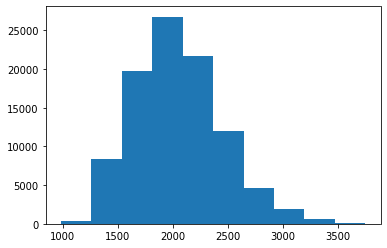

In [9]:
# Plot a histogram of MW
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(x='MW',data=dayton);

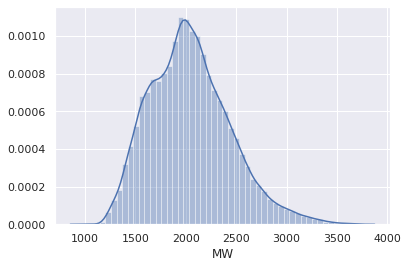

In [10]:
# Histogram with seaborn
sns.set(style='darkgrid')

sns.distplot(dayton['MW']);

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


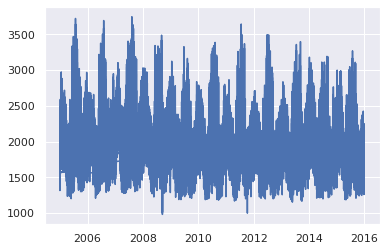

In [11]:
# Plot the MW over time
plt.plot('MW',data=dayton);

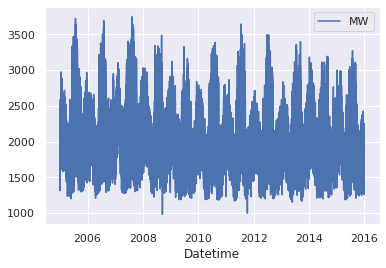

In [12]:
# MW over time w/ seaborn
mw = dayton[['MW']]
sns.lineplot(data=mw);

In [0]:
# Heatmap of MW over the course of a year
# sns.heatmap(data=[df_time['MW'],df_time['date']], annot=True, linewidths=.5);

## Average MW every Hour

In [0]:
# Create a df that has the average MW of every hour

# Group data first by year, then by month
g = df_time.groupby(['timestamp'])

# For each group, calculate the average of only the MW column
hourly_averages = g.aggregate({'MW':np.mean})

In [15]:
hourly_averages

,MW
timestamp,
00:00:00,1908.515695
01:00:00,1790.595766
02:00:00,1713.407435
03:00:00,1665.773227
04:00:00,1644.639601
05:00:00,1663.816687
06:00:00,1751.331009
07:00:00,1910.820423
08:00:00,2027.029390


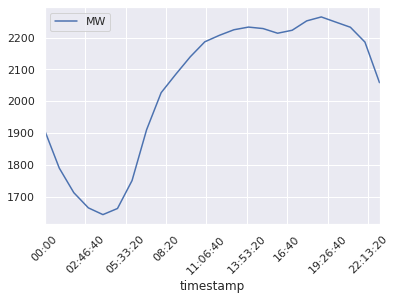

In [16]:
hourly_averages.plot(y='MW')
pyplot.xticks(rotation=45)
pyplot.show()

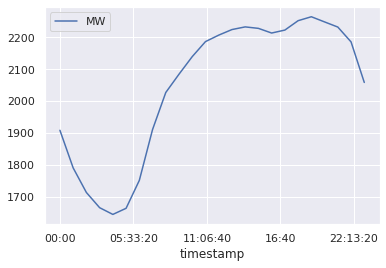

In [17]:
# MW over time w/ seaborn
sns.lineplot(data=hourly_averages,estimator=None);

## Average MW of every hour, in each season

In [0]:
# Create a df that has the average MW of every hour, in each season

# Group data first by year, then by month
g = df_time.groupby(['season','timestamp'])

# For each group, calculate the average of only the MW column
season_hourly_averages = g.aggregate({'MW':np.mean})

In [0]:
# Create subsetted average DFs for each season
season1 = season_hourly_averages.loc[(season_hourly_averages.index.get_level_values('season')=='winter')]
season2 = season_hourly_averages.loc[(season_hourly_averages.index.get_level_values('season')=='spring')]
season3 = season_hourly_averages.loc[(season_hourly_averages.index.get_level_values('season')=='summer')]
season4 = season_hourly_averages.loc[(season_hourly_averages.index.get_level_values('season')=='fall')]

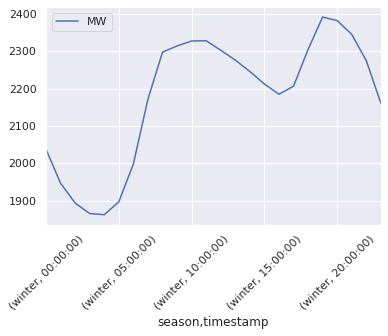

In [20]:
# Plot season 1 hourly average
season1.plot(y='MW')
pyplot.xticks(rotation=45)
pyplot.show()

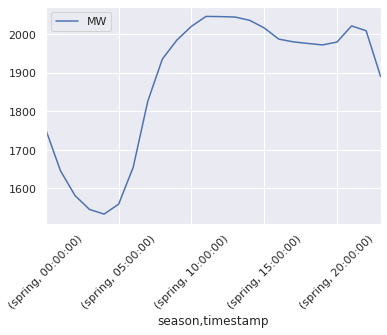

In [21]:
# Plot season 2 hourly average
season2.plot(y='MW')
pyplot.xticks(rotation=45)
pyplot.show()

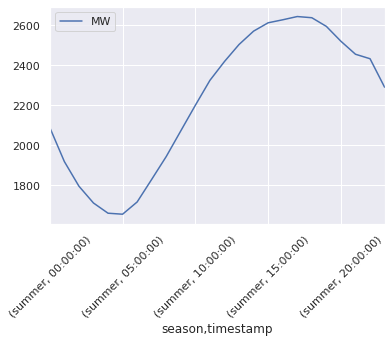

In [22]:
# Plot season 3 hourly average
season3.plot(y='MW')
pyplot.xticks(rotation=45)
pyplot.show()

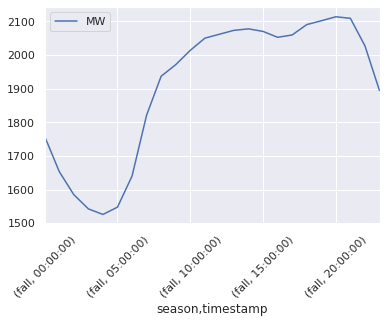

In [23]:
# Plot season 4 hourly average
season4.plot(y='MW')
pyplot.xticks(rotation=45)
pyplot.show()

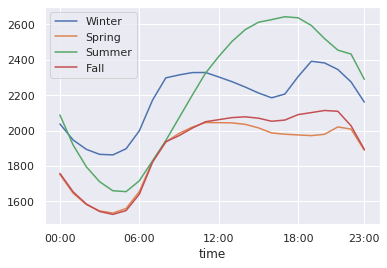

In [24]:
# Plot seasonal variation in hourly average energy demand
plt.plot(season1.index.get_level_values('timestamp'),'MW',
         data=season1,label='Winter')
plt.plot(season2.index.get_level_values('timestamp'),'MW',
         data=season2,label='Spring')
plt.plot(season3.index.get_level_values('timestamp'),'MW',
         data=season3,label='Summer')
plt.plot(season4.index.get_level_values('timestamp'),'MW',
         data=season4,label='Fall')
plt.legend(loc='best')
plt.xticks(ticks=['00:00','06:00','12:00','18:00','23:00']);

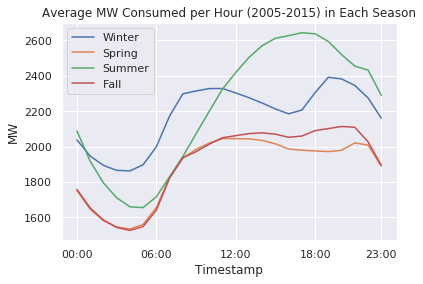

In [51]:
# Plot seasonal variation in hourly average energy demand w/ seaborn

sns.lineplot(x=season1.index.get_level_values('timestamp'),
             y=season1['MW'])
sns.lineplot(x=season2.index.get_level_values('timestamp'),
             y=season2['MW'])
sns.lineplot(x=season3.index.get_level_values('timestamp'),
             y=season3['MW'])
sns.lineplot(x=season4.index.get_level_values('timestamp'),
             y=season4['MW'])
plt.legend(labels=['Winter','Spring','Summer','Fall'])
plt.xlabel('Timestamp')
plt.title('Average MW Consumed per Hour (2005-2015) in Each Season')
plt.xticks(ticks=['00:00','06:00','12:00','18:00','23:00']);

## Average MW of every day

In [0]:
# Create a df that has the average MW of every day

# Group data first by year, then by month
g = df_time.groupby(['date'])

# For each group, calculate the average of only the MW column
daily_averages = g.aggregate({'MW':np.mean})

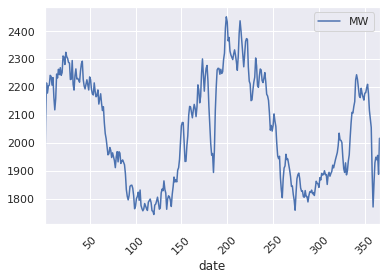

In [27]:
# Plot average MW of every day
daily_averages.plot(y='MW')
pyplot.xticks(rotation=45)
pyplot.show()

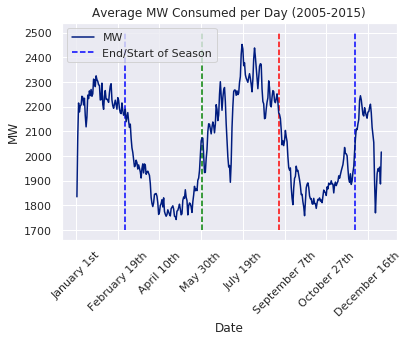

In [28]:
# Plot average MW of every day w/ seaborn

# Create an array of the last day of each season
season_end = [59,151,243,334]
season_end_labels = ['End of Winter',
                     'End of Spring',
                     'End of Summer',
                     'End of Fall']
colors=['blue','green','red','blue']
season_x_labels=['January 1st',
                 'February 19th',
                 'April 10th',
                 'May 30th',
                 'July 19th',
                 'September 7th',
                 'October 27th',
                 'December 16th']
season_x_ticks = [0,50,100,150,200,250,300,350]

# Make the plot
from seaborn import choose_colorbrewer_palette
ax = sns.lineplot(data=daily_averages,palette='dark')
plt.vlines(x=season_end,ymin=1700,ymax=2500,label='End/Start of Season',ls='--',colors=colors)
plt.title('Average MW Consumed per Day (2005-2015)')
plt.xticks(rotation=45,labels=season_x_labels,ticks=season_x_ticks)
plt.xlabel('Date')
plt.ylabel('MW')
sns.set_style('darkgrid')
plt.legend();

## Average MW of each month

In [0]:
# Create a df that has the average MW of every month

# Group data first by year, then by month
g = df_time.groupby(['month'])

# For each group, calculate the average of only the MW column
monthly_averages = g.aggregate({'MW':np.mean})

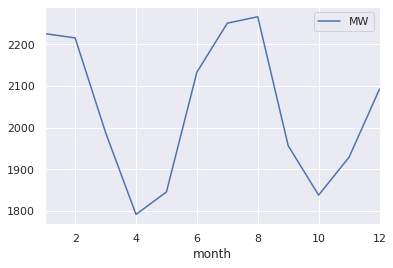

In [30]:
# Plot average MW of each month
monthly_averages.plot(y='MW')
pyplot.show()

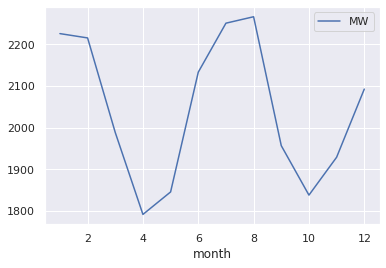

In [31]:
# Plot average MW of each month w/ seaborn
sns.lineplot(data=monthly_averages);

##Average MW of each season

In [0]:
# Create a df that has the average MW of every season

# Group data first by year, then by month
g = df_time.groupby(['season'])

# For each group, calculate the average of only the MW column
seasonal_averages = g.aggregate({'MW':np.mean})

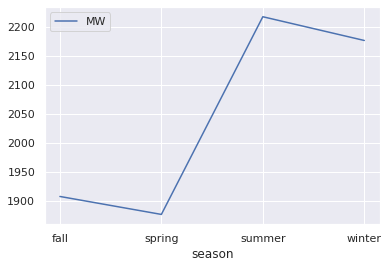

In [33]:
# Plot average MW of each month w/ seaborn
sns.lineplot(data=seasonal_averages);

## Same graphs with sum instead of average

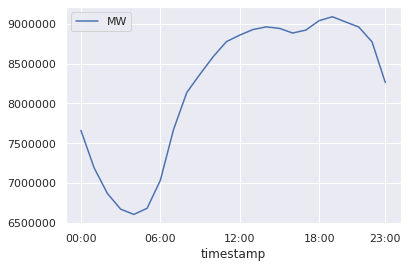

In [34]:
# Create a df that has the sum MW of every hour

# Group data first by year, then by month
g = df_time.groupby(['timestamp'])

# For each group, calculate the average of only the MW column
hourly_sum = g.aggregate({'MW':sum})

# Plot w/ seaborn
sns.lineplot(data=hourly_sum,estimator=None)
plt.xticks(ticks=['00:00','06:00','12:00','18:00','23:00']);

In [0]:
# Create a df that has the sum MW of every hour, in each season

# Group data first by year, then by month
g = df_time.groupby(['season','timestamp'])

# For each group, calculate the average of only the MW column
season_hourly_sum = g.aggregate({'MW':sum})

In [0]:
# Create subsetted average DFs for each season
season1_sum = season_hourly_sum.loc[(season_hourly_sum.index.get_level_values('season')=='winter')]
season2_sum = season_hourly_sum.loc[(season_hourly_sum.index.get_level_values('season')=='spring')]
season3_sum = season_hourly_sum.loc[(season_hourly_sum.index.get_level_values('season')=='summer')]
season4_sum = season_hourly_sum.loc[(season_hourly_sum.index.get_level_values('season')=='fall')]

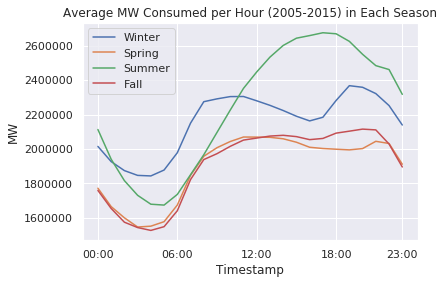

In [37]:
# Plot seasonal variation in hourly sum energy demand w/ seaborn

sns.lineplot(x=season1_sum.index.get_level_values('timestamp'),
             y=season1_sum['MW'])
sns.lineplot(x=season2_sum.index.get_level_values('timestamp'),
             y=season2_sum['MW'])
sns.lineplot(x=season3_sum.index.get_level_values('timestamp'),
             y=season3_sum['MW'])
sns.lineplot(x=season4_sum.index.get_level_values('timestamp'),
             y=season4_sum['MW'])
plt.legend(labels=['Winter','Spring','Summer','Fall'])
plt.xlabel('Timestamp')
plt.xticks(ticks=['00:00','06:00','12:00','18:00','23:00']);

In [0]:
# Create a df that has the sum MW of every day

# Group data first by year, then by month
g = df_time.groupby(['date'])

# For each group, calculate the average of only the MW column
daily_sums = g.aggregate({'MW':sum})

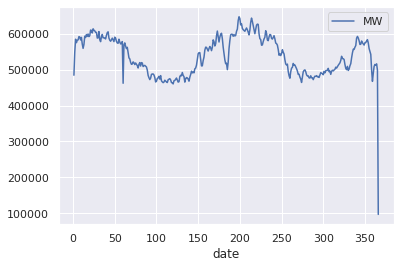

In [39]:
# Plot sum MW of every day
sns.lineplot(data=daily_sums);

## Autocorrelation

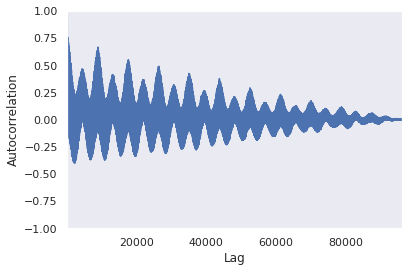

In [40]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_time['MW'])
pyplot.show()

## Seasonality

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
winter = df_time[df_time['season']=='winter']
spring = df_time[df_time['season']=='spring']
summer = df_time[df_time['season']=='summer']
fall = df_time[df_time['season']=='fall']

winter_result = seasonal_decompose(winter['MW'],model='additive',freq=24)
spring_result = seasonal_decompose(spring['MW'],model='additive',freq=24)
summer_result = seasonal_decompose(summer['MW'],model='additive',freq=24)
fall_result = seasonal_decompose(fall['MW'],model='additive',freq=24)

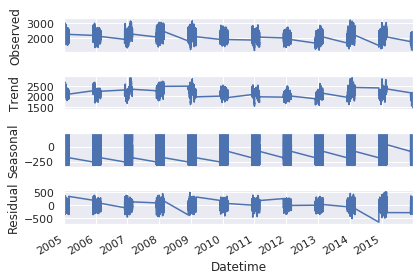

In [42]:
winter_result.plot()
pyplot.show()

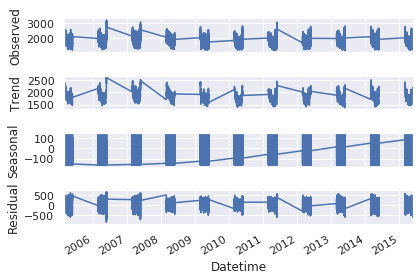

In [43]:
spring_result.plot()
pyplot.show()

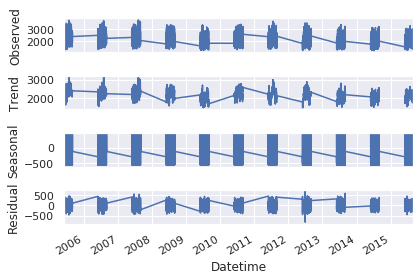

In [44]:
summer_result.plot()
pyplot.show()

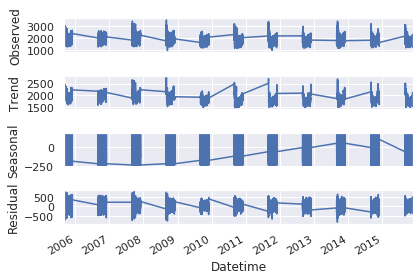

In [45]:
fall_result.plot()
pyplot.show()

In [0]:
df_time.to_csv('pjm_dayton_clean.csv')